In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import string
import sklearn

from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# About columns:
df=df.rename(columns={"v1":"Class_Labels","v2":"Message","Unnamed: 2":"N1","Unnamed: 3":"N2","Unnamed: 4":"N3"})

In [6]:
df.tail(5)

,Class_Labels,Message,N1,N2,N3
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# About Columns:

- v1 Showing levels {ham which means not-spam and other is spam}
- v2 Showing comments {Messages Received}

**ABOUT Data Set**

In [7]:
print("Data Frame Info -")
print("SHAPE of Data Frame :",df.shape,"\nSIZE of the Data Frame :",df.size,"\nDIMENSION :",df.ndim)

Data Frame Info -
SHAPE of Data Frame : (5572, 5) 
SIZE of the Data Frame : 27860 
DIMENSION : 2


In [8]:
print("Printing Data Set Information")
df.info()

Printing Data Set Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class_Labels  5572 non-null   object
 1   Message       5572 non-null   object
 2   N1            50 non-null     object
 3   N2            12 non-null     object
 4   N3            6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Observation:
- All the Dtype is Object
- Maximum null columns of N1,N2,N3 in Non-Null Counts
- Memory used 218KB

# **Checking Unique Values**

In [9]:
# Unique Values
for i in df.columns:
  if df[i].dtype=="object":
    print("COLUMN : ",i)
    print(df[i].unique(),"\n", ("********"*14)*2,"\n")

COLUMN :  Class_Labels
['ham' 'spam'] 
 ******************************************************************************************************************************************************************************************************************************** 

COLUMN :  Message
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name'] 
 *************************************************************************************************************************************************************************************

**OBSERVATION**

- LOT OF NULL VALUES ARE PRESENT

# Checking Null values and Percentage

In [10]:
df_frame=pd.DataFrame(data={"Total Missing Values":df.isnull().sum(),"Missing Percentage":(df.isnull().sum()/df.shape[0])*100})
df_frame

,Total Missing Values,Missing Percentage
Class_Labels,0,0.000000
Message,0,0.000000
N1,5522,99.102656
N2,5560,99.784637
N3,5566,99.892319


**MISSING VALUE**

- Majority of the Missing Values in N1,N2,N3

Manupulation the N1,N2,N3 can 

Text(0.5, 1.0, 'MISSING VALUES')

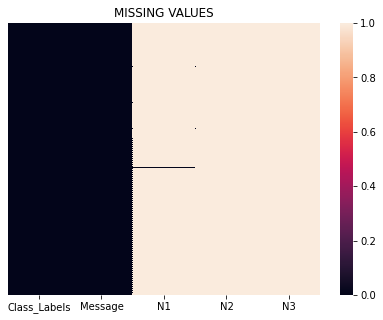

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("MISSING VALUES")

In [12]:
df.drop('N1',axis=1,inplace=True)

In [13]:
df.drop(['N2','N3'],axis=1,inplace=True)

# **Checking Duplicated**

In [14]:
print("Total Duplicated ROws",df.duplicated().sum())

Total Duplicated ROws 403


In [15]:
print("Checking First Duplicated Rows ",df[df.duplicated(keep="first")].shape[0])

Checking First Duplicated Rows  403


In [16]:
print("Checking last Duplicated Rows",df[df.duplicated(keep='last')].shape[0])

Checking last Duplicated Rows 403


In [17]:
# checking duplicated row messages
df.loc[df.duplicated(), :]

,Class_Labels,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# After Dropping
print("Total Duplicated Rows are: ",df.duplicated().sum())

Total Duplicated Rows are:  0


Class_Labels    0
Message         0
dtype: int64


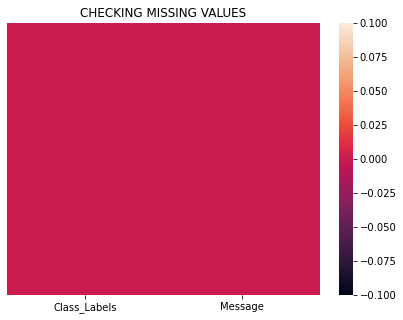

In [20]:
print(df.isnull().sum())
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("CHECKING MISSING VALUES")
plt.show()

# STEPS Taken

- Data Cleaning
- EDA
- Text Preprocessing
- Model Building
- Evalution
- Improvement

# **Exploratory Data Analysis**

ham     4516
spam     653
Name: Class_Labels, dtype: int64


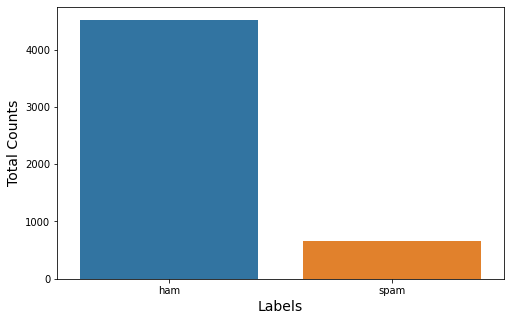

In [21]:
# Univariate Analysis

plt.figure(figsize=(8,5))
print(df['Class_Labels'].value_counts())
sns.countplot(x='Class_Labels',data=df,)
plt.xlabel("Labels",fontsize=14,rotation=0)
plt.ylabel("Total Counts",fontsize=14,rotation=90)

plt.show()

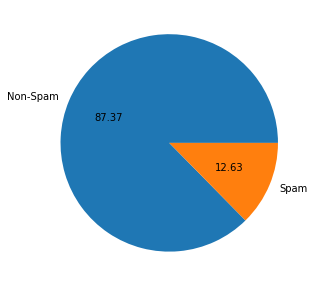

In [22]:
plt.figure(figsize=(6,5))
plt.pie(df['Class_Labels'].value_counts(),labels=['Non-Spam','Spam'],autopct="%0.02f")
plt.show()

# Observation

- Imbalanced Data Sentences

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

 **LENGTH OF CHARACTERS**

In [24]:
print("Chapture the total Length of the Words in Sentences")

df['Total_characters']=df['Message'].apply(len)

Chapture the total Length of the Words in Sentences


**LENGTH OF WORDS**

In [25]:
# capture Length of total words using word tokenize

df['Total_Words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

**LENGTH OF SENTENCES**

In [26]:
# Capture the Number of sentences by using sentence tokenize in that message

df["Total_Sentences"]=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.sample(2)

,Class_Labels,Message,Total_characters,Total_Words,Total_Sentences
2118,spam,U can WIN å£100 of Music Gift Vouchers every w...,160,27,2
4482,ham,True lov n care wil nevr go unrecognized. thou...,159,30,3


# Univariate Analysis on the data

Minimum Character : 2 
Maximum Characters : 910


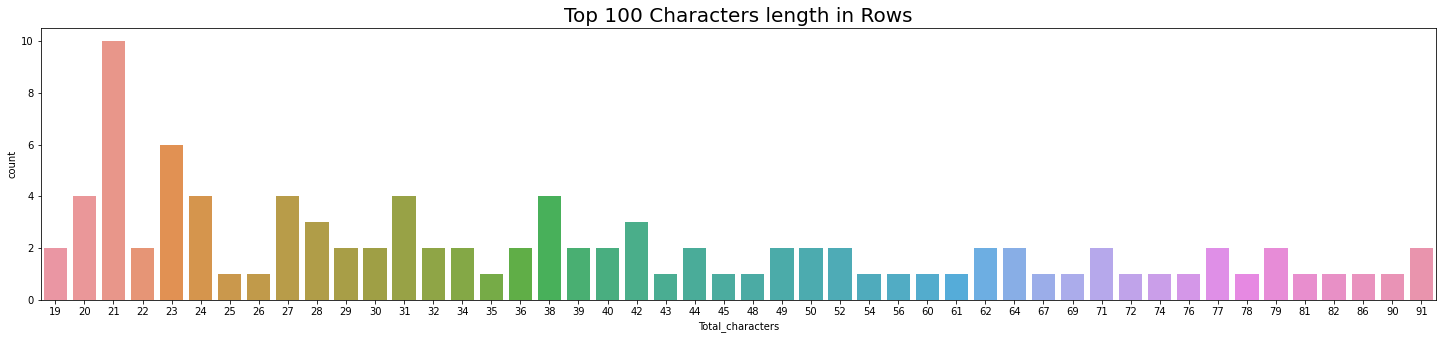

In [28]:
plt.figure(figsize=(25,5))
sns.countplot(x=df["Total_characters"].value_counts()[:100],data=df)
plt.title("Top 100 Characters length in Rows",Fontsize=20)
print("Minimum Character :",df['Total_characters'].min(),"\nMaximum Characters :",df['Total_characters'].max())

Shows Total

Minimum Words : 1 
Maximum Words : 220


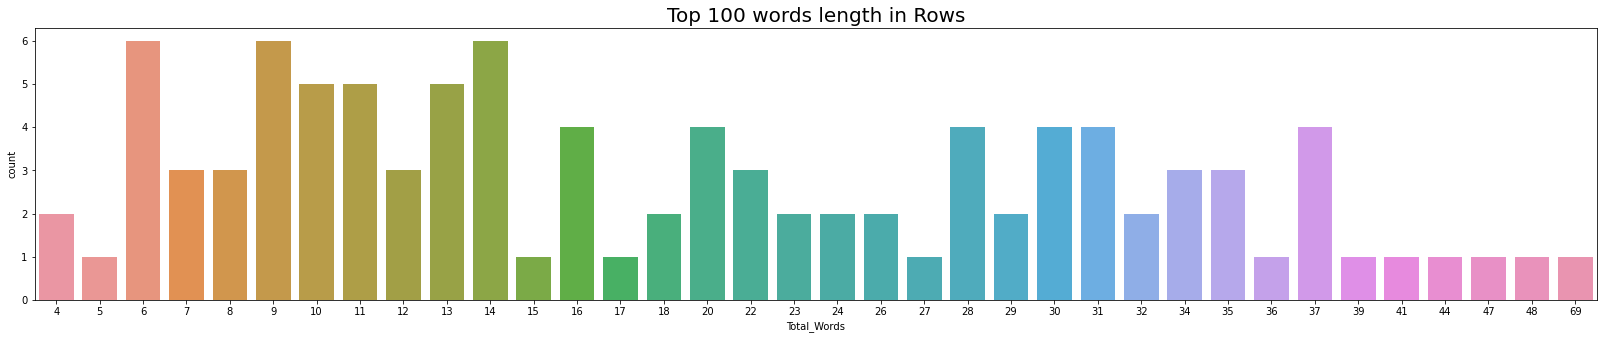

In [29]:
plt.figure(figsize=(28,5))
sns.countplot(x=df["Total_Words"][:100],data=df)
plt.title("Top 100 words length in Rows",Fontsize=20)
print("Minimum Words :",df['Total_Words'].min(),"\nMaximum Words :",df['Total_Words'].max())

Minimum Sentences : 1 
Maximum Sentences : 28


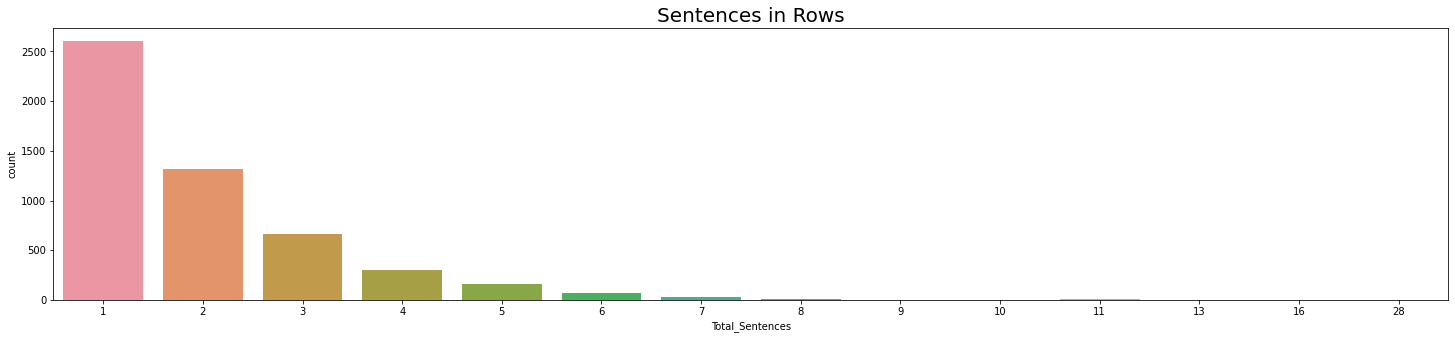

In [30]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['Total_Sentences'],data=df)
plt.title("Sentences in Rows",Fontsize=20)
print("Minimum Sentences :",df['Total_Sentences'].min(),"\nMaximum Sentences :",df['Total_Sentences'].max())

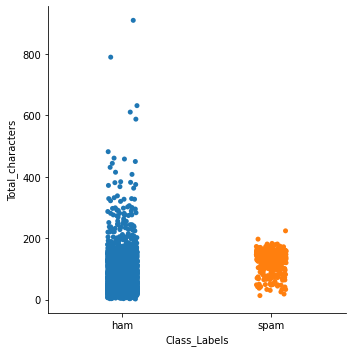

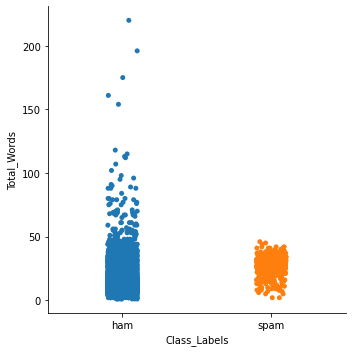

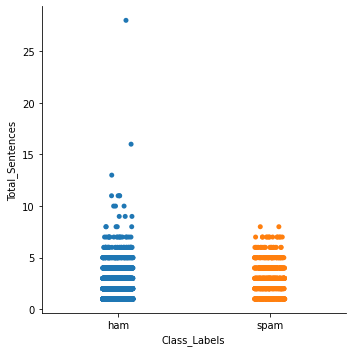

In [31]:
column=['Total_characters', 'Total_Words','Total_Sentences']

for i in column:
    sns.catplot(y=i,data=df,x='Class_Labels')
    plt.show()


## Bi-Variate Analysis

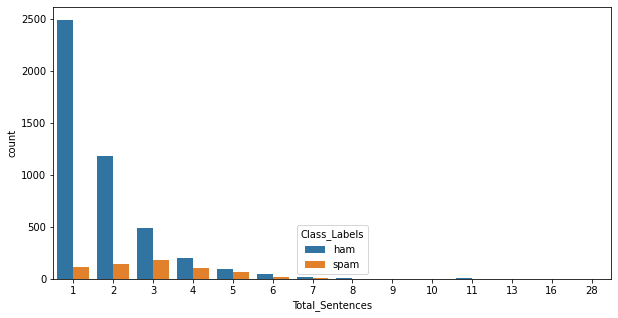

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Total_Sentences'],hue=df['Class_Labels'],data=df)

**Observations**
- Possibility of Spam increases with increase in sentences

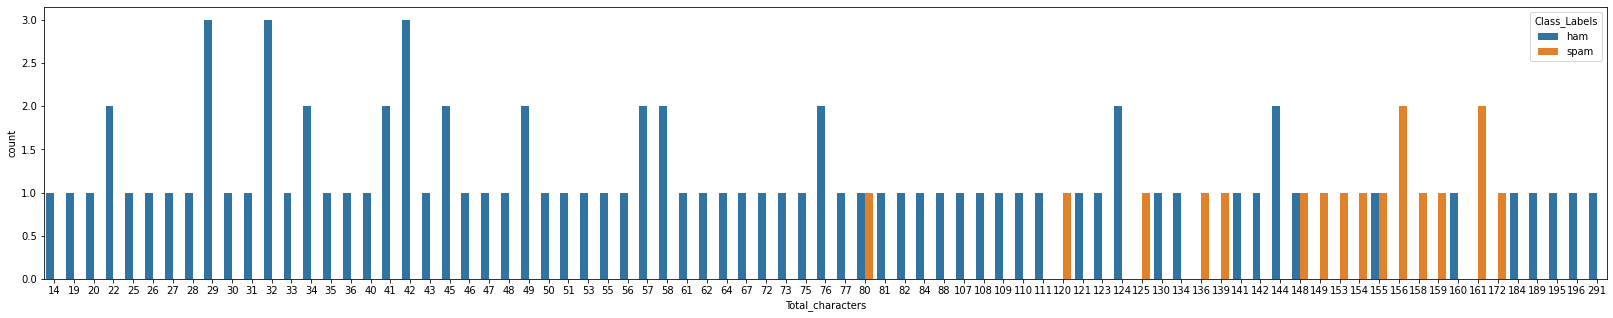

In [33]:
plt.figure(figsize=(28,5))
sns.countplot(x=df['Total_characters'][:100],hue=df['Class_Labels'],data=df)

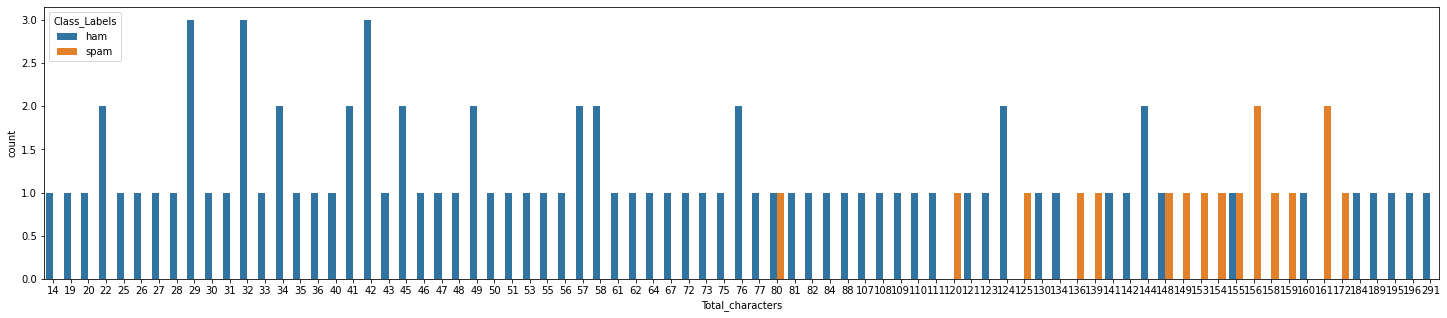

In [34]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['Total_characters'][:100],hue=df['Class_Labels'],data=df)
plt.show()

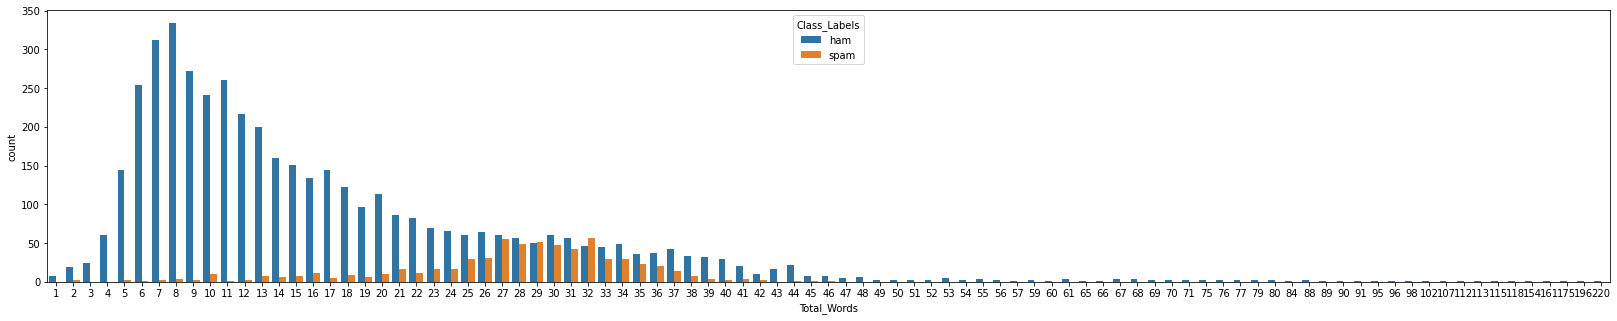

In [35]:
plt.figure(figsize=(28,5))
sns.countplot(x=df['Total_Words'],hue=df['Class_Labels'],data=df)
plt.show()

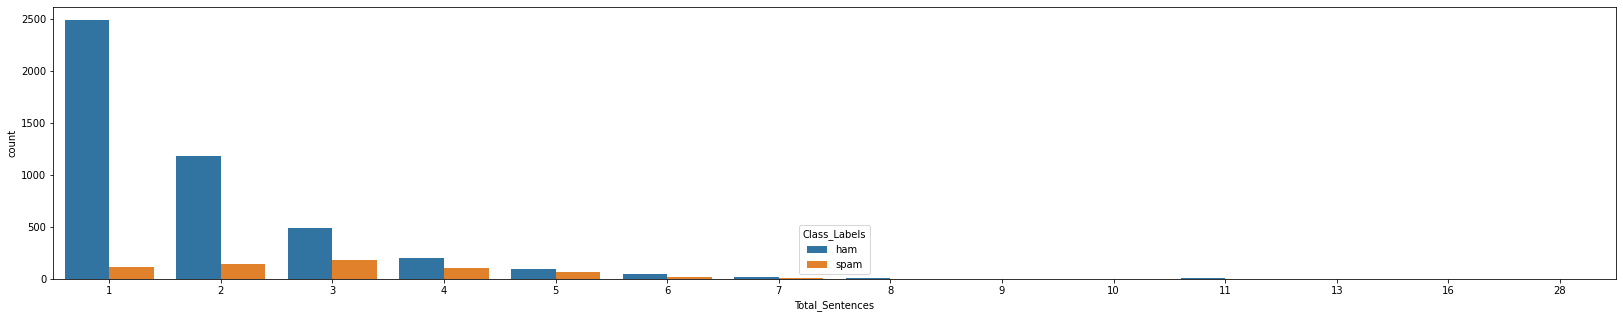

In [36]:
plt.figure(figsize=(28,5))
sns.countplot(x=df['Total_Sentences'],hue=df['Class_Labels'],data=df)

# Observation

In [37]:
# unique values
print("Class_Labels : ",df['Class_Labels'].unique())


Class_Labels :  ['ham' 'spam']


In [38]:
# replacing class_labels with replace
df['Class_Labels']=df['Class_Labels'].replace(['ham','spam'],[0,1])

In [39]:
df.sample(2)

,Class_Labels,Message,Total_characters,Total_Words,Total_Sentences
903,0,Lovely smell on this bus and it ain't tobacco...,49,11,1
4822,0,:-) :-),7,6,1


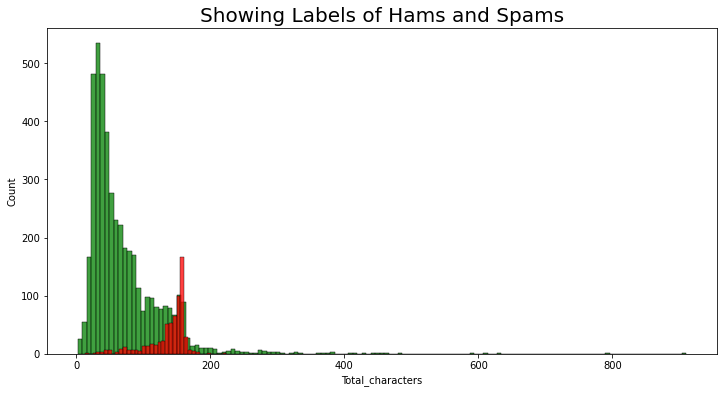

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class_Labels']==0]['Total_characters'],color='green')
sns.histplot(df[df['Class_Labels']==1]['Total_characters'],color='red')
plt.title("Showing Labels of Hams and Spams",fontsize=20)
plt.show()

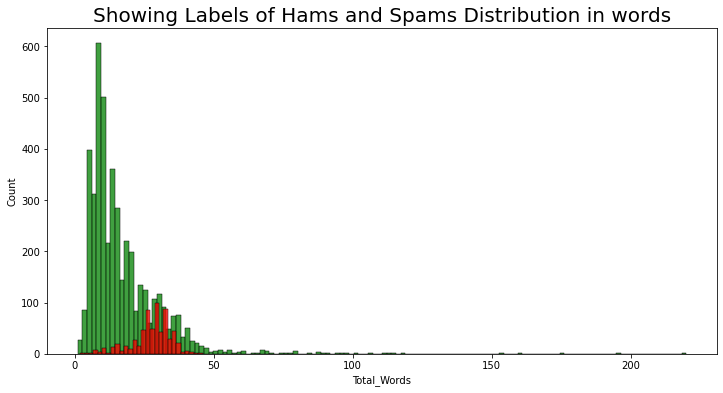

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class_Labels']==0]['Total_Words'],color='green')
sns.histplot(df[df['Class_Labels']==1]['Total_Words'],color='red')
plt.title("Showing Labels of Hams and Spams Distribution in words",fontsize=20)
plt.show()

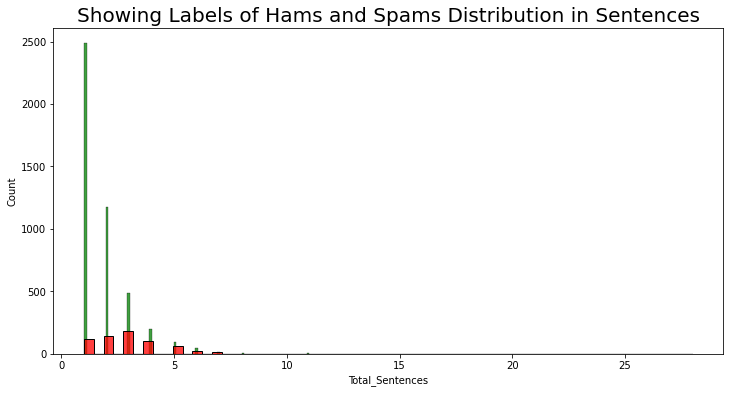

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class_Labels']==0]['Total_Sentences'],color='green')
sns.histplot(df[df['Class_Labels']==1]['Total_Sentences'],color='red')
plt.title("Showing Labels of Hams and Spams Distribution in Sentences",fontsize=20)
plt.show()

# Multi-variate Graph

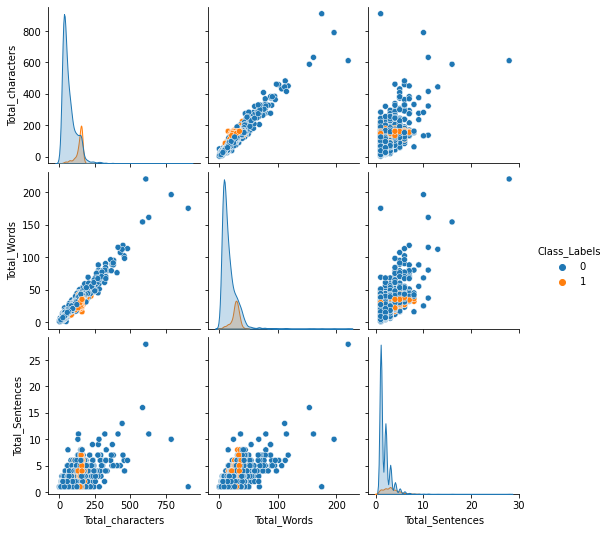

In [43]:
sns.pairplot(hue="Class_Labels",data=df)

# Descriptive Graph

In [44]:
df.describe()

,Class_Labels,Total_characters,Total_Words,Total_Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


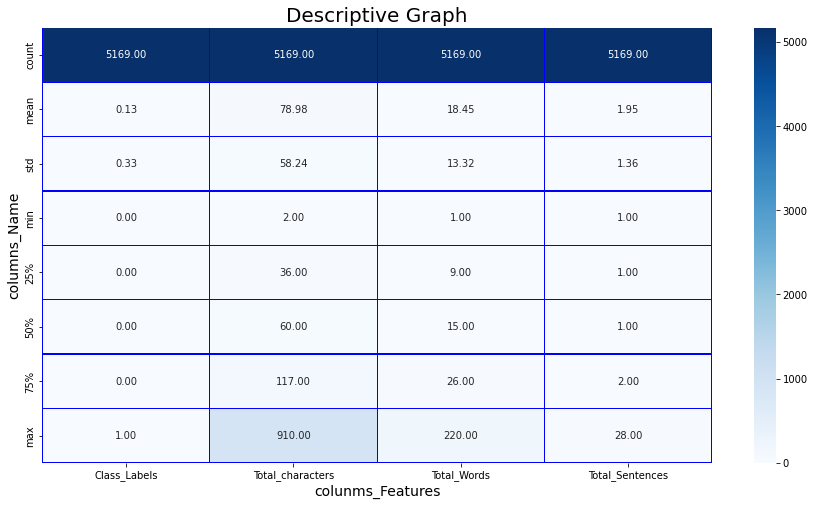

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor='blue',cmap='Blues',fmt='0.2f')
plt.title("Descriptive Graph",fontsize=20)
plt.xlabel('colunms_Features',fontsize=14)
plt.ylabel('columns_Name',fontsize=14)
plt.show()

# Observations
- Total_characters,Total_words Shows Huge outliers
- Total_characters, Total_words, Right Skewed as mean greater than Median

# Correlation Graph

In [46]:
df.corr()

,Class_Labels,Total_characters,Total_Words,Total_Sentences
Class_Labels,1.000000,0.384717,0.262984,0.284901
Total_characters,0.384717,1.000000,0.965770,0.638143
Total_Words,0.262984,0.965770,1.000000,0.684541
Total_Sentences,0.284901,0.638143,0.684541,1.000000


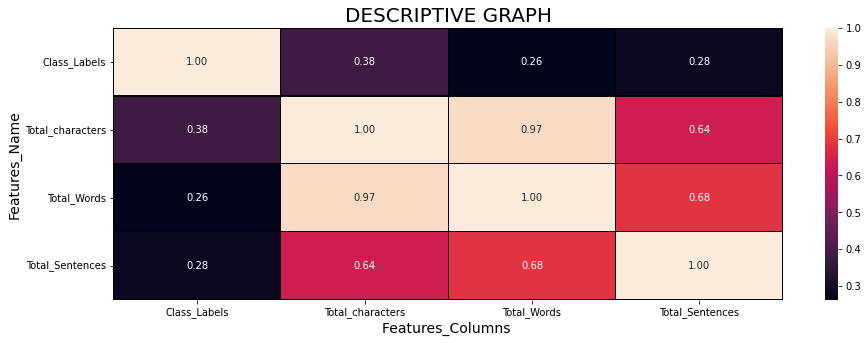

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr().T,annot=True,fmt='0.02f',linewidths=0.20,linecolor='black')
plt.title("DESCRIPTIVE GRAPH",fontsize=20)
plt.xlabel("Features_Columns ",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.show()

In [48]:
df.corr()['Class_Labels']

Class_Labels        1.000000
Total_characters    0.384717
Total_Words         0.262984
Total_Sentences     0.284901
Name: Class_Labels, dtype: float64

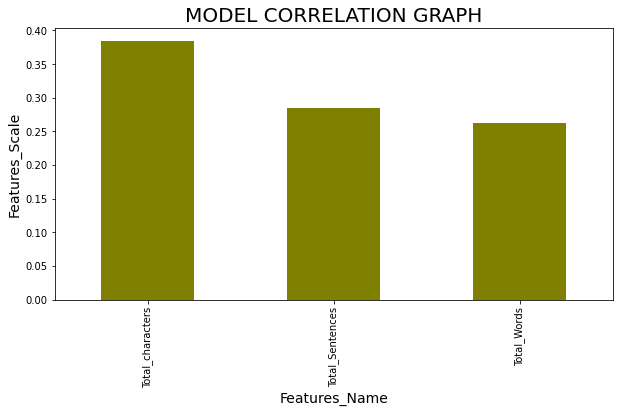

In [49]:
plt.figure(figsize=(10,5))
df.corr()['Class_Labels'].sort_values(ascending=False).drop("Class_Labels").plot(kind='bar',color='olive')
plt.title("MODEL CORRELATION GRAPH",fontsize=20)
plt.xlabel("Features_Name",fontsize=14,rotation=0)
plt.ylabel("Features_Scale",fontsize=14)
plt.show()

**Observations**

- Total_characters is 38 percentage positively correlated with the target Variable
- Total_Words are 26 percent Positively correlated with the target variable
- Total_sentences are 28 percent positively correlated with the target varible


In [50]:
df['Total_characters'].dtypes

dtype('int64')

# **CHECKING OUTLIERS**

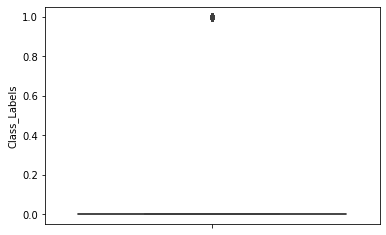

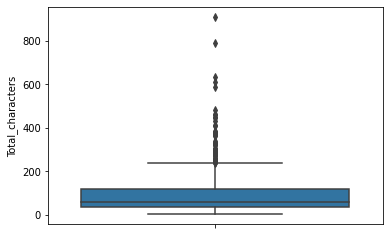

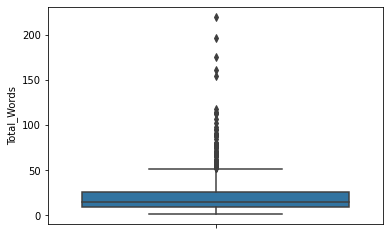

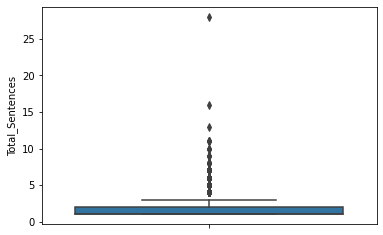

In [51]:
box=['Class_Labels', 'Total_characters', 'Total_Words', 'Total_Sentences']

for i in box:
    sns.boxplot(y=i,data=df)
    plt.show()

# Observations:

- Total_Sentences, Total_words, Total_Characters Have huge Outliers

- Class_Labels is a Target Variable

# **Skewness**

In [52]:
df.skew().sort_values()

Class_Labels        2.250180
Total_characters    2.610100
Total_Sentences     3.278772
Total_Words         3.312637
dtype: float64

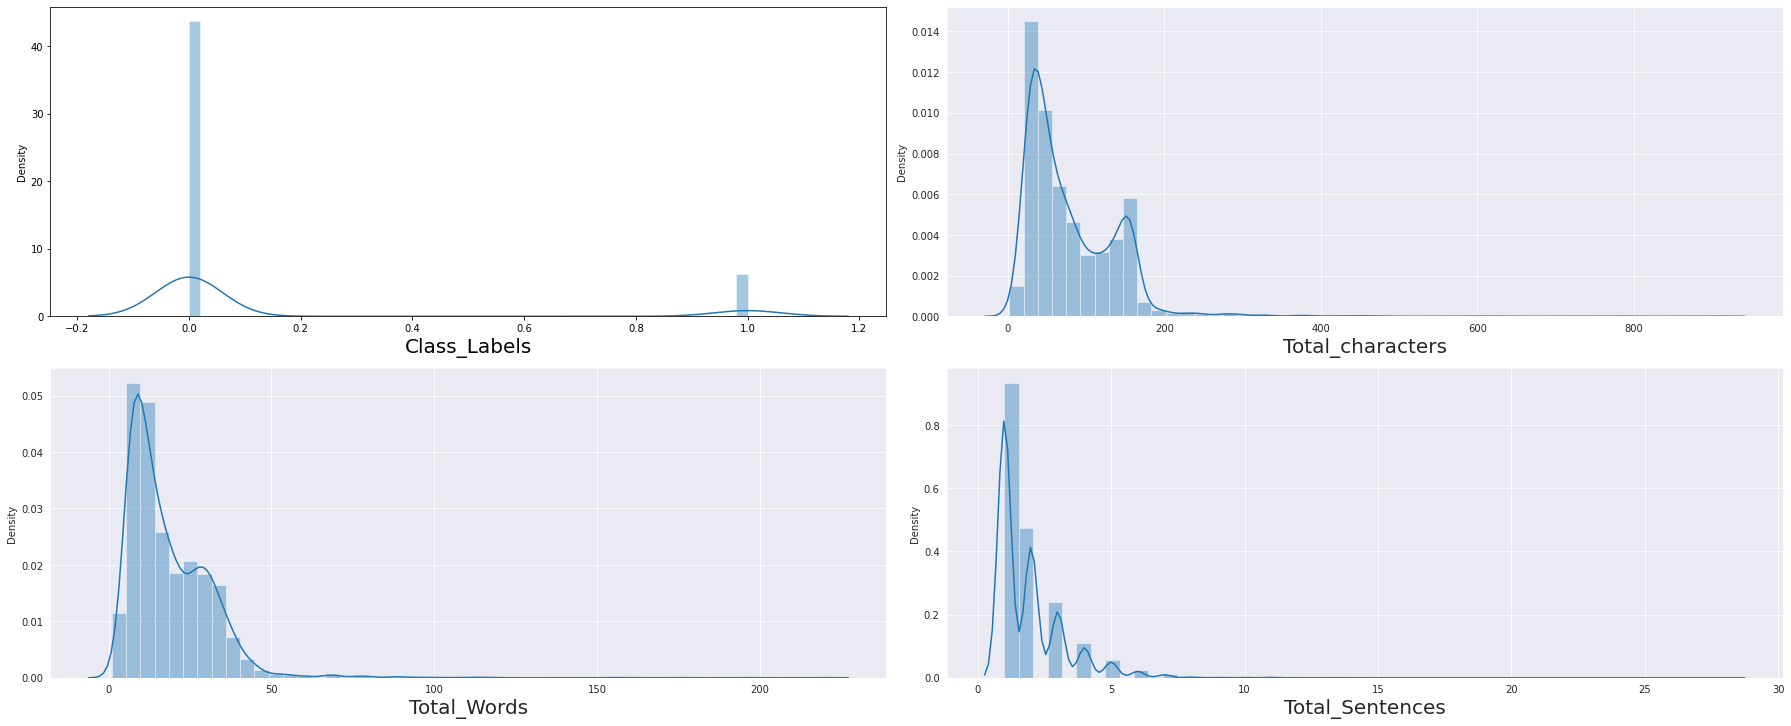

In [53]:
plt.figure(figsize=(25,100),facecolor='white',edgecolor='black')
plotnumb=1

for i in box:
    if plotnumb<=10:
        ax=plt.subplot(20,2,plotnumb)
        sns.set_style("darkgrid")
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        
    plotnumb+=1
plt.tight_layout()

# Observations:

- Shows High Skewness in each Columns

# **Data Pre-Processing**

- Lower case
- Tokenization
- Removing Stop Words and punction
- POS
- Steamming or Lemmatization

In [54]:
def transform(text):
  text=text.lower() # make in lower case
  text=nltk.word_tokenize(text) # tokenized each word

  corpus=[] 
  for i in text:
    if i.isalnum():# if text is alpha-numerical
      corpus.append(i) # append text

  new_corpus=corpus.copy() # making a copy
  corpus.clear() # clearing corpus

  for i in new_corpus: # from new corpus

 # using stop words of english language and all punctuations 
    if i not in stopwords.words("english") and i not in string.punctuation:
      corpus.append(i) # appending 

  new_corpus=corpus.copy() # making a copy
  corpus.clear() #clearing the copy

  ps=PorterStemmer() #importing Porter Stemmer

  for i in new_corpus:
    corpus.append(ps.stem(i)) # used stemming process

  return " ".join(corpus)

In [55]:
# Testing sample

df['Message'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [57]:
# install stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
# using transformation
transform(df['Message'][8])

'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [59]:
df['Transformed_Message']=df['Message'].apply(transform)
df.head(2)

,Class_Labels,Message,Total_characters,Total_Words,Total_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [61]:
print("New Total_characters in row 1",len(df['Transformed_Message'][0]))

New Total_characters in row 1 76


# **FREQUENT USES OF WORDS**

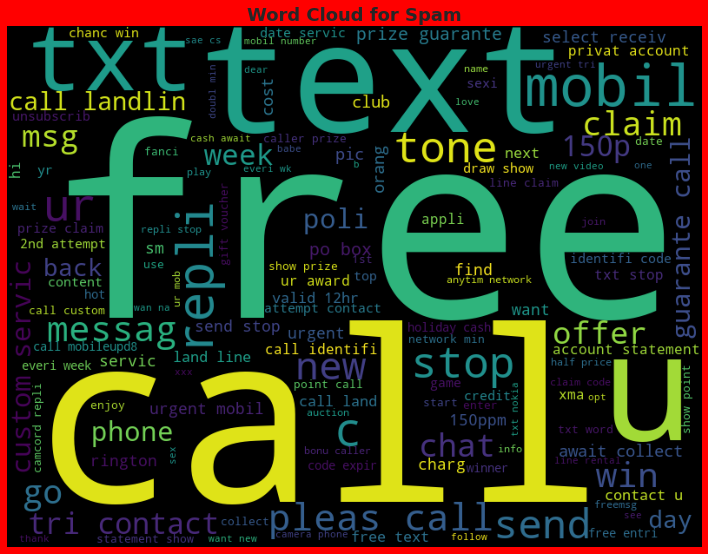

In [62]:
# importing word clouds
from wordcloud import WordCloud
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==1]['Transformed_Message'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(10,8),facecolor='red')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for Spam',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

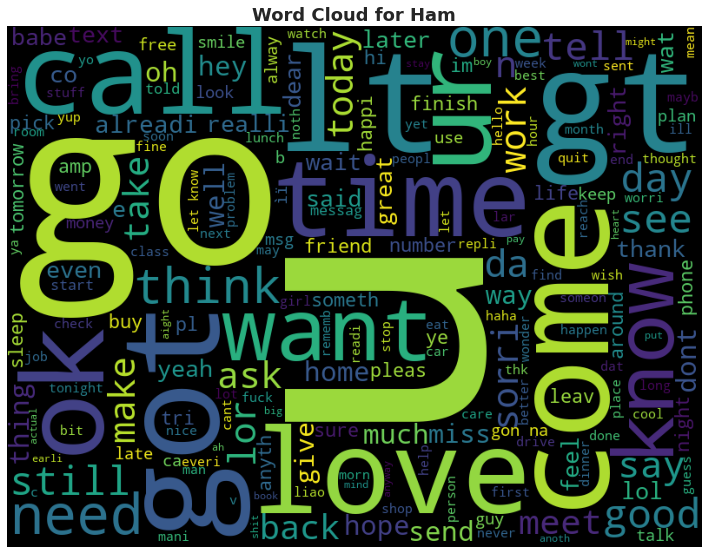

In [63]:
# using features of wordclouds
wc=WordCloud(width=800,height=600,min_font_size=11,background_color='black')
# generating a cloud of words
spam_wordcloud=wc.generate(df[df['Class_Labels']==0]['Transformed_Message'].str.cat(sep=' '))

# ploting using plt
plt.figure(figsize=(10,8),facecolor='white')
plt.imshow(spam_wordcloud)
plt.title('Word Cloud for Ham',fontsize=18,fontweight ='bold',)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

# **CHECKING FREQUENT TOP TEN WORDS**

**SPAM CORPUS**

In [66]:
spam_corpus=[]
for message in df[df['Class_Labels']==1]['Transformed_Message'].tolist():
  for word in message.split():
    spam_corpus.append(word)

In [67]:
print("Total_Length of Spam Corpus ",len(spam_corpus))

Total_Length of Spam Corpus  9939


In [93]:
# checking collections
from collections import Counter
Top_Words=pd.DataFrame(Counter(spam_corpus).most_common(10),columns=['text','counts'])
Top_Words

,text,counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


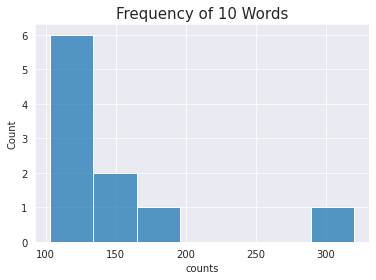

In [113]:
sns.histplot(data=Top_Words,x=Top_Words['counts'])
plt.title("Frequency of 10 Words",fontsize=15)
plt.show()

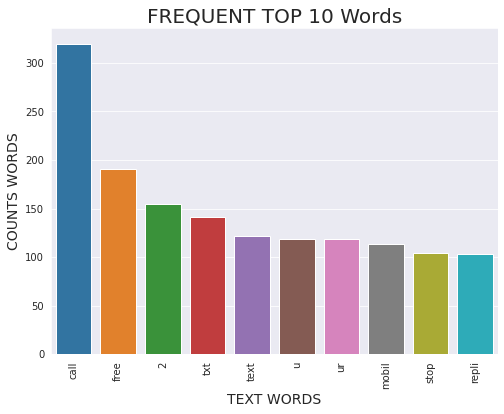

In [112]:
plt.figure(figsize=(8,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(10))[0],pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
plt.xlabel("TEXT WORDS",fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("COUNTS WORDS",fontsize=14)
plt.title("FREQUENT TOP 10 Words",fontsize=20)
plt.show()

# **HAM CORPUS**

In [124]:
ham_corpus=[]
for message in df[df['Class_Labels']==0]['Transformed_Message'].tolist():
  for word in message.split():
    ham_corpus.append(word)

In [125]:
print("The Length of Ham Corpus",len(ham_corpus))

The Length of Ham Corpus 35394


In [129]:
from collections import Counter
Ham_words=pd.DataFrame(Counter(ham_corpus).most_common(10),columns=['Text','Counts'])
Ham_words

,Text,Counts
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


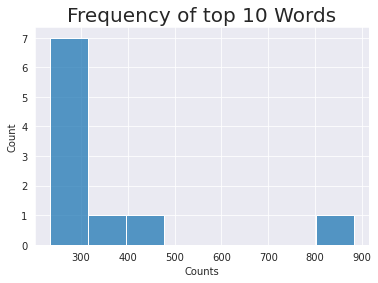

In [132]:
sns.histplot(data=Ham_words,x='Counts')
plt.title("Frequency of top 10 Words",fontsize=20)
plt.show()

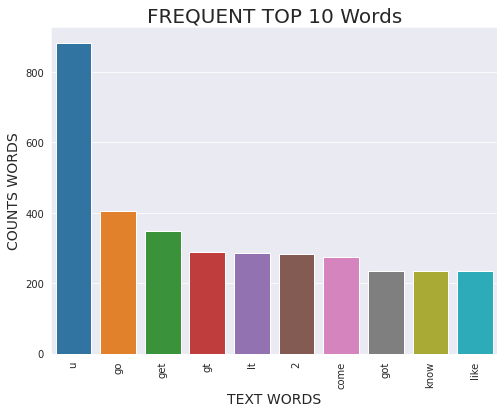

In [133]:
plt.figure(figsize=(8,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(10))[0],pd.DataFrame(Counter(ham_corpus).most_common(10))[1])
plt.xlabel("TEXT WORDS",fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("COUNTS WORDS",fontsize=14)
plt.title("FREQUENT TOP 10 Words",fontsize=20)
plt.show()

# **MODEL BUILDING**

### Converting to text to vectors or vectorization
- Bag of Words(CountVectorizer)
- TF-IDF
- Word2vec

In [136]:
#Trying with Bag of Words 

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['Transformed_Message']).toarray()

In [139]:
print("The Shape of X :",x.shape)

The Shape of X : (5169, 6708)


In [142]:
y=df['Class_Labels']
print("The shape of y: ",y.shape)

The shape of y:  (5169,)


# Importing Library:

In [155]:
from sklearn.model_selection import train_test_split

# Metrics Used
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score

# Naive_Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Another Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


# creating instances
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

# Another Models
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
gbc=GradientBoostingClassifier()
sgd=SGDClassifier()
mlp=MLPClassifier()


In [148]:
nb_models=[gnb,mnb,bnb] # creating list for mnb models
models=[lg,dtc,knn,svc,rfc,etc,gbc,sgd,mlp] # creating list for other models

In [152]:
# Find Train Test

for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    #train and score
    lg.fit(x_train,y_train)
    lg.score(x_train,y_train)
    
    #predict train and test
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    
    # loop
    
    print("The random state:-",i)
    print("Training accuracy_score is ",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy_score is ",accuracy_score(y_test,pred_test)*100)
    print("Precision Score",precision_score(y_test, pred_test)*100,"\n")

The random state:- 0
Training accuracy_score is  99.44377267230955
Testing accuracy_score is  97.96905222437138
Precision Score 99.23076923076923 

The random state:- 1
Training accuracy_score is  99.51632406287787
Testing accuracy_score is  96.80851063829788
Precision Score 98.11320754716981 

The random state:- 2
Training accuracy_score is  99.51632406287787
Testing accuracy_score is  97.87234042553192
Precision Score 99.15254237288136 

The random state:- 3
Training accuracy_score is  99.58887545344619
Testing accuracy_score is  97.29206963249516
Precision Score 99.12280701754386 

The random state:- 4
Training accuracy_score is  99.49214026602176
Testing accuracy_score is  98.06576402321083
Precision Score 100.0 

The random state:- 5
Training accuracy_score is  99.56469165659009
Testing accuracy_score is  97.96905222437138
Precision Score 99.0909090909091 

The random state:- 6
Training accuracy_score is  99.51632406287787
Testing accuracy_score is  97.96905222437138
Precision Sco

In [153]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.20)

print("Shape x train ",x_train.shape," x test",x_test.shape)
print("shape y train ",y_train.shape," y_test",y_test.shape)

Shape x train  (4135, 6708)  x test (1034, 6708)
shape y train  (4135,)  y_test (1034,)


# **Naive_Baiyes Models**

****************************** 
 GaussianNB() 
 ******************************
Training Score 0.924788391777509 And Precision Score 47.43589743589743
Accuracy Training Score = 0.924788391777509  Accuracy Test Score = 0.8646034816247582 

Training Confusion_Matrix 
 [[3299  311]
 [   0  525]] Testing Confusion_Matrix 
 [[783 123]
 [ 17 111]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       906
           1       0.47      0.87      0.61       128

    accuracy                           0.86      1034
   macro avg       0.73      0.87      0.77      1034
weighted avg       0.92      0.86      0.88      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.8767649903288202 Training Score  0.924788391777509 Testing Score  0.8646034816247582
A cross-fold  3 CV_mean  0.8728961114335462 Training Score  0.924788391777509 Testing Score  0.8646034816247582
A cross-fold  4 CV_mean  0.8686390938106835 Tra

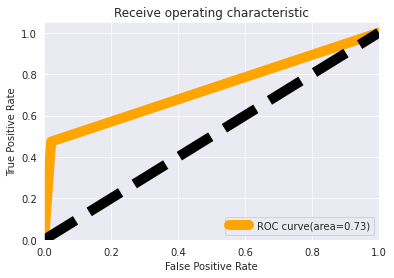

****************************** 
 MultinomialNB() 
 ******************************
Training Score 0.992261185006046 And Precision Score 86.52482269503547
Accuracy Training Score = 0.992261185006046  Accuracy Test Score = 0.9758220502901354 

Training Confusion_Matrix 
 [[3599   11]
 [  21  504]] Testing Confusion_Matrix 
 [[887  19]
 [  6 122]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       906
           1       0.87      0.95      0.91       128

    accuracy                           0.98      1034
   macro avg       0.93      0.97      0.95      1034
weighted avg       0.98      0.98      0.98      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9727220329239301 Training Score  0.992261185006046 Testing Score  0.9758220502901354
A cross-fold  3 CV_mean  0.9740762236409363 Training Score  0.992261185006046 Testing Score  0.9758220502901354
A cross-fold  4 CV_mean  0.975043189213651 T

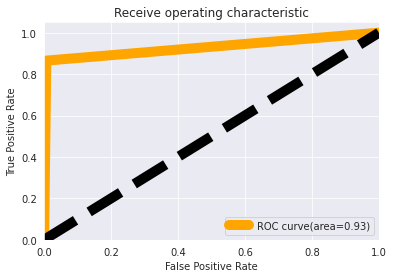

****************************** 
 BernoulliNB() 
 ******************************
Training Score 0.97726723095526 And Precision Score 94.5945945945946
Accuracy Training Score = 0.97726723095526  Accuracy Test Score = 0.971953578336557 

Training Confusion_Matrix 
 [[3607    3]
 [  91  434]] Testing Confusion_Matrix 
 [[900   6]
 [ 23 105]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       906
           1       0.95      0.82      0.88       128

    accuracy                           0.97      1034
   macro avg       0.96      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.954343422699427 Training Score  0.97726723095526 Testing Score  0.971953578336557
A cross-fold  3 CV_mean  0.966918165989553 Training Score  0.97726723095526 Testing Score  0.971953578336557
A cross-fold  4 CV_mean  0.9673038497362555 Training Sco

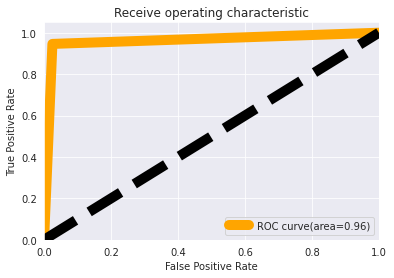

In [ ]:
for m in nb_models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    #result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test)*100)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    # graph
    
    from sklearn.metrics import roc_curve,auc

    fpr,tpr,thresholds= roc_curve(pred_test,y_test)
    roc_auc =auc(fpr,tpr)

    plt.figure()
    plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

    plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receive operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

# **OTHER MODELS**

****************************** 
 LogisticRegression() 
 ******************************
Training Score 0.9949214026602177 And Precision Score 100.0
Accuracy Training Score = 0.9949214026602177  Accuracy Test Score = 0.9806576402321083 

Training Confusion_Matrix 
 [[3609    1]
 [  20  505]] Testing Confusion_Matrix 
 [[906   0]
 [ 20 108]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       1.00      0.84      0.92       128

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9690460114616954 Training Score  0.9949214026602177 Testing Score  0.9806576402321083
A cross-fold  3 CV_mean  0.9746566066937512 Training Score  0.9949214026602177 Testing Score  0.9806576402321083
A cross-fold  4 CV_mean  0.9744625442068389 Tra

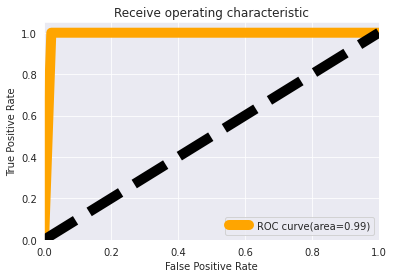

****************************** 
 DecisionTreeClassifier() 
 ******************************
Training Score 1.0 And Precision Score 88.18181818181819
Accuracy Training Score = 1.0  Accuracy Test Score = 0.9574468085106383 

Training Confusion_Matrix 
 [[3610    0]
 [   0  525]] Testing Confusion_Matrix 
 [[893  13]
 [ 31  97]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       906
           1       0.88      0.76      0.82       128

    accuracy                           0.96      1034
   macro avg       0.92      0.87      0.90      1034
weighted avg       0.96      0.96      0.96      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9483457192303777 Training Score  1.0 Testing Score  0.9574468085106383
A cross-fold  3 CV_mean  0.9599535693557749 Training Score  1.0 Testing Score  0.9574468085106383
A cross-fold  4 CV_mean  0.9574384216991229 Training Score  1.0 Testing Score  0.9574468085

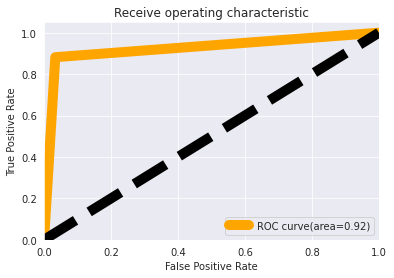

****************************** 
 KNeighborsClassifier() 
 ******************************
Training Score 0.9238210399032648 And Precision Score 100.0
Accuracy Training Score = 0.9238210399032648  Accuracy Test Score = 0.9177949709864603 

Training Confusion_Matrix 
 [[3610    0]
 [ 315  210]] Testing Confusion_Matrix 
 [[906   0]
 [ 85  43]]
Classification Report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       906
           1       1.00      0.34      0.50       128

    accuracy                           0.92      1034
   macro avg       0.96      0.67      0.73      1034
weighted avg       0.92      0.92      0.90      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9009478804246935 Training Score  0.9238210399032648 Testing Score  0.9177949709864603
A cross-fold  3 CV_mean  0.9079125556200426 Training Score  0.9238210399032648 Testing Score  0.9177949709864603
A cross-fold  4 CV_mean  0.9098461829474738 T

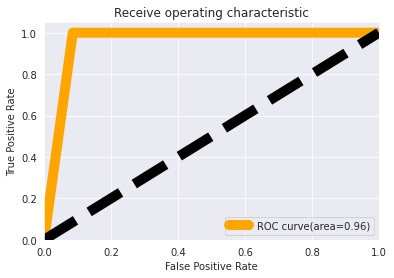

****************************** 
 SVC() 
 ******************************
Training Score 0.9949214026602177 And Precision Score 100.0
Accuracy Training Score = 0.9949214026602177  Accuracy Test Score = 0.9680851063829787 

Training Confusion_Matrix 
 [[3610    0]
 [  21  504]] Testing Confusion_Matrix 
 [[906   0]
 [ 33  95]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       906
           1       1.00      0.74      0.85       128

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.92      1034
weighted avg       0.97      0.97      0.97      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9609210975441791 Training Score  0.9949214026602177 Testing Score  0.9680851063829787
A cross-fold  3 CV_mean  0.967305088024763 Training Score  0.9949214026602177 Testing Score  0.9680851063829787
A cross-fold  4 CV_mean  0.9673041490378054 Training Score  0.9

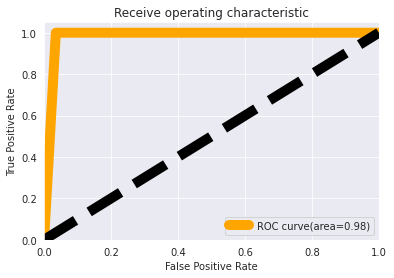

****************************** 
 RandomForestClassifier() 
 ******************************
Training Score 1.0 And Precision Score 98.9795918367347
Accuracy Training Score = 1.0  Accuracy Test Score = 0.9690522243713733 

Training Confusion_Matrix 
 [[3610    0]
 [   0  525]] Testing Confusion_Matrix 
 [[905   1]
 [ 31  97]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       906
           1       0.99      0.76      0.86       128

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.959566234108425 Training Score  1.0 Testing Score  0.9690522243713733
A cross-fold  3 CV_mean  0.9653704778487135 Training Score  1.0 Testing Score  0.9690522243713733
A cross-fold  4 CV_mean  0.9667235040309933 Training Score  1.0 Testing Score  0.969052224371

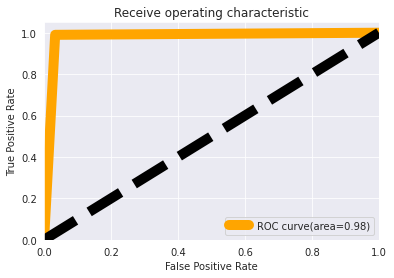

****************************** 
 ExtraTreesClassifier() 
 ******************************
Training Score 1.0 And Precision Score 99.0
Accuracy Training Score = 1.0  Accuracy Test Score = 0.9709864603481625 

Training Confusion_Matrix 
 [[3610    0]
 [   0  525]] Testing Confusion_Matrix 
 [[905   1]
 [ 29  99]]
Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       906
           1       0.99      0.77      0.87       128

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9659503356468313 Training Score  1.0 Testing Score  0.9709864603481625
A cross-fold  3 CV_mean  0.971754691429677 Training Score  1.0 Testing Score  0.9709864603481625
A cross-fold  4 CV_mean  0.9715597681251033 Training Score  1.0 Testing Score  0.9709864603481625
A cross-f

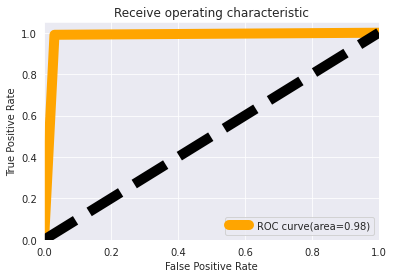

****************************** 
 GradientBoostingClassifier() 
 ******************************
Training Score 0.9743651753325272 And Precision Score 96.875
Accuracy Training Score = 0.9743651753325272  Accuracy Test Score = 0.9632495164410058 

Training Confusion_Matrix 
 [[3609    1]
 [ 105  420]] Testing Confusion_Matrix 
 [[903   3]
 [ 35  93]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       906
           1       0.97      0.73      0.83       128

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9526011132336474 Training Score  0.9743651753325272 Testing Score  0.9632495164410058
A cross-fold  3 CV_mean  0.9585993422325401 Training Score  0.9743651753325272 Testing Score  0.9632495164410058
A cross-fold  4 CV_mean  0.95685657948

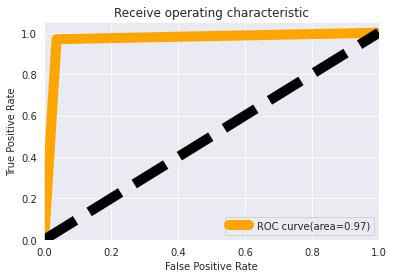

****************************** 
 SGDClassifier() 
 ******************************
Training Score 0.999758162031439 And Precision Score 99.12280701754386
Accuracy Training Score = 0.999758162031439  Accuracy Test Score = 0.9845261121856866 

Training Confusion_Matrix 
 [[3610    0]
 [   1  524]] Testing Confusion_Matrix 
 [[905   1]
 [ 15 113]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.99      0.88      0.93       128

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.968852812427017 Training Score  0.999758162031439 Testing Score  0.9845261121856866
A cross-fold  3 CV_mean  0.9767846778874058 Training Score  0.999758162031439 Testing Score  0.9845261121856866
A cross-fold  4 CV_mean  0.9769775751306751 T

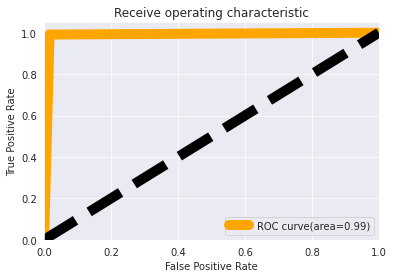

****************************** 
 MLPClassifier() 
 ******************************
Training Score 1.0 And Precision Score 99.0909090909091
Accuracy Training Score = 1.0  Accuracy Test Score = 0.9806576402321083 

Training Confusion_Matrix 
 [[3610    0]
 [   0  525]] Testing Confusion_Matrix 
 [[905   1]
 [ 19 109]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.99      0.85      0.92       128

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034

 * * * * * 
 MODEL CROSSVALIDATION
A cross-fold  2 CV_mean  0.9721415375678929 Training Score  1.0 Testing Score  0.9806576402321083
A cross-fold  3 CV_mean  0.9769781389050106 Training Score  1.0 Testing Score  0.9806576402321083
A cross-fold  4 CV_mean  0.9765898299727754 Training Score  1.0 Testing Score  0.9806576402321083
A c

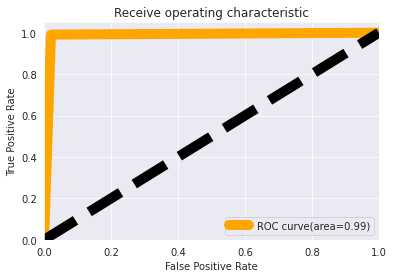

In [157]:
for m in models:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    
    #result
    print("******"*5,"\n",m,"\n","******"*5)
    print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test)*100)
    print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
    print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
    print("Classification Report \n",classification_report(y_test,pred_test))
    
    print(" *"*5,"\n MODEL CROSSVALIDATION")
    
    #train test Accuracy
    train_accuracy=accuracy_score(y_train,pred_train)
    test_accuracy =accuracy_score(y_test,pred_test)

    #Range finding cv Score
    for i in range(2,6):
        cv_score=cross_val_score(m,x,y,cv=i)
        cv_mean=cv_score.mean()
        print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    # graph
    
    from sklearn.metrics import roc_curve,auc

    fpr,tpr,thresholds= roc_curve(pred_test,y_test)
    roc_auc =auc(fpr,tpr)

    plt.figure()
    plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)

    plt.plot([0,1],[0,1],color='black',lw=10,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receive operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

From the above observation
Selected LogisticRegression,MLPClassifier for Hyper-Parameter Tunning as these models Works the best with better accuracy, and better F1 score and Precision Score.

- Logistic Regression


- MLP Classifier


# Hyper-Parameter

In [162]:
from sklearn.model_selection import GridSearchCV
grid_params={'penalty':['l1', 'l2', 'elasticnet'],
           'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'C':(0.001, 0.01, 0.1, 1, 10)}

gsv=GridSearchCV(lg,grid_params, cv=5)
gsv.fit(x_train,y_train)
print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)
print()

Best Params:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} 
Best_Score  0.9787182587666263



In [207]:
lg=LogisticRegression(penalty= 'l2', solver= 'liblinear',random_state=50,max_iter=5000,multi_class='auto',C=1.3)
lg.fit(x_train,y_train)
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)


print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Training Score 0.97726723095526 And Precision Score 100.0
Accuracy Training Score = 0.9961305925030229  Accuracy Test Score = 0.9825918762088974 

Training Confusion_Matrix 
 [[3609    1]
 [  15  510]] Testing Confusion_Matrix 
 [[906   0]
 [ 18 110]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       1.00      0.86      0.92       128

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



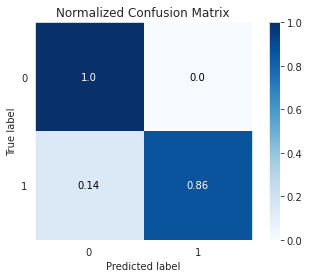

In [208]:
# Creating a normalized confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_test, normalize=True)
plt.show()

In [209]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

#Range finding cv Score
for i in range(2,6):
  cv_score=cross_val_score(m,x,y,cv=i)
  cv_mean=cv_score.mean()
  print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.954343422699427 Training Score  0.9961305925030229 Testing Score  0.9825918762088974
A cross-fold  3 CV_mean  0.966918165989553 Training Score  0.9961305925030229 Testing Score  0.9825918762088974
A cross-fold  4 CV_mean  0.9673038497362555 Training Score  0.9961305925030229 Testing Score  0.9825918762088974
A cross-fold  5 CV_mean  0.9686595725956397 Training Score  0.9961305925030229 Testing Score  0.9825918762088974


- Almost all the cv have same have close by cv_sccore

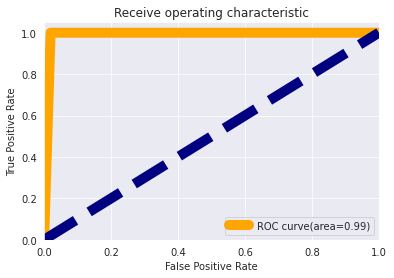

In [210]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test,y_test)
roc_auc =auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [196]:
from sklearn.model_selection import GridSearchCV
grid_params={'activation':[ 'logistic', 'relu'],
             'solver':['lbfgs', 'sgd', 'adam'],
             'learning_rate':['constant','invscaling','adaptive']}

gsv=GridSearchCV(mlp,grid_params,cv=5)
gsv.fit(x_train,y_train)
print("Best Params: ",gsv.best_params_,"\nBest_Score ",gsv.best_score_)
print()

Best Params:  {'activation': 'relu', 'learning_rate': 'constant', 'solver': 'lbfgs'} 
Best_Score  0.9821039903264813



In [211]:
mlp=MLPClassifier(activation= 'relu', learning_rate='constant', solver= 'adam',alpha=0.001,max_iter=5000,random_state=50)
mlp.fit(x_train,y_train)
pred_train1=mlp.predict(x_train)
pred_test1=mlp.predict(x_test)

print("Training Score",score,"And Precision Score",precision_score(y_test, pred_test1)*100)
print("Accuracy Training Score =",accuracy_score(y_train,pred_train1)," Accuracy Test Score =",accuracy_score(y_test,pred_test1),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train1),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test1))
print("Classification Report \n",classification_report(y_test,pred_test1))

Training Score 0.97726723095526 And Precision Score 99.09909909909909
Accuracy Training Score = 1.0  Accuracy Test Score = 0.9816247582205029 

Training Confusion_Matrix 
 [[3610    0]
 [   0  525]] Testing Confusion_Matrix 
 [[905   1]
 [ 18 110]]
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       0.99      0.86      0.92       128

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



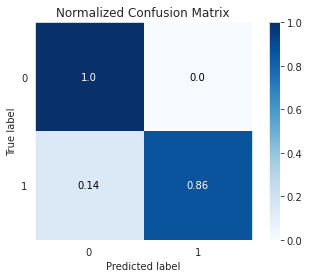

In [212]:
# Creating a normalized confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_test1, normalize=True)
plt.show()

In [214]:
#train test Accuracy
train_accuracy=accuracy_score(y_train,pred_train1)
test_accuracy =accuracy_score(y_test,pred_test1)

#Range finding cv Score
for i in range(2,6):
  cv_score=cross_val_score(m,x,y,cv=i)
  cv_mean=cv_score.mean()
  print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.954343422699427 Training Score  1.0 Testing Score  0.9816247582205029
A cross-fold  3 CV_mean  0.966918165989553 Training Score  1.0 Testing Score  0.9816247582205029
A cross-fold  4 CV_mean  0.9673038497362555 Training Score  1.0 Testing Score  0.9816247582205029
A cross-fold  5 CV_mean  0.9686595725956397 Training Score  1.0 Testing Score  0.9816247582205029


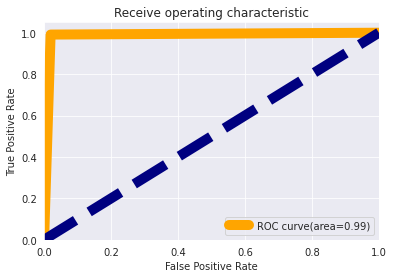

In [215]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds= roc_curve(pred_test1,y_test)
roc_auc =auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='orange',lw=10,label='ROC curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receive operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Saving Model

In [217]:
import pickle
filename='spam_classification.pkl'
pickle.dump(lg,open(filename,"wb"))

In [218]:
# loading pack file
pickled_model= pickle.load(open(filename,'rb'))
result=pickled_model.score(x_test,y_test)
result*100

98.25918762088975

In [220]:
pd.set_option("display.max_columns",None)# max rows display
pd.set_option("display.max_rows",None) # max columns display

In [221]:
array=np.array(y_test)
conclude=pd.DataFrame([pickled_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conclude

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021